In [78]:
import pandas as pd
import numpy as np
#import random

from sklearn.cluster import KMeans
import numpy as np
import csv
import math
import matplotlib.pyplot
from matplotlib import pyplot as plt

# 1. Preprocessing

### Read CSV file

In [79]:
def readCSV(file):
    df = pd.read_csv(file)
    return df

In [80]:
def writeCSV(Dataset,filename):
    Dataset.to_csv(filename ,index = False)

### Readingthe CSV files

In [81]:
HODiffPairDF = readCSV("HumanObserved-Features-Data/diffn_pairs.csv")
HOSamePairDF = readCSV("HumanObserved-Features-Data/same_pairs.csv")
HOImg = readCSV("HumanObserved-Features-Data/HumanObserved-Features-Data.csv")

In [82]:
#Taking only 791 records from Different pairs
HODiffPairDF = HODiffPairDF.sample(791)
HODiffPairDF.index = range(791)

imgA = HODiffPairDF.iloc[0]['img_id_A']
imgB = HODiffPairDF.iloc[0]['img_id_B']

### Concat Dataset - (Merging to form Dataset)

In [83]:
def mergeDatasets(pairedDataset,imgFeatures):
    HODiffDataset = pd.merge(pairedDataset, imgFeatures, left_on='img_id_A', right_on='img_id')
    HODiffDataset = HODiffDataset.drop(columns=['img_id', 'Unnamed: 0'])
    HODiffDataset = pd.merge(HODiffDataset, imgFeatures, left_on='img_id_B', right_on='img_id', suffixes=('_a', '_b'))
    HODiffDataset = HODiffDataset.drop(columns=['img_id', 'Unnamed: 0'])
    return HODiffDataset

In [84]:
def rearrangeColumns(Dataset):
    cols = Dataset.columns.tolist()
    temp = cols[2]
    del cols[2]
    cols.append(temp) 
    Dataset = Dataset[cols]
    return Dataset

### Diff Pair - concat

In [85]:
HODiffDataset = mergeDatasets(HODiffPairDF,HOImg)
HODiffDataset = rearrangeColumns(HODiffDataset)
#writeCSV(HODiffDataset,'HO_Diff_Dataset.csv')

### Same Pair - Concat

In [86]:
HOSameDataset = mergeDatasets(HOSamePairDF,HOImg)
HOSameDataset = rearrangeColumns(HOSameDataset)
#writeCSV(HOSameDataset,'HO_Same_Dataset.csv')

### Subtraction Dataset

In [87]:
def getSubtractionDataset(mergedDataset,dataset):
    aFMat = mergedDataset.values[:,2:11]
    bFMat = mergedDataset.values[:,11:20]
    resultMat = np.absolute(aFMat - bFMat)

    ilist = [i for i in range(791)]
    columnList = [i for i in range(1,10)]
    result_df = pd.DataFrame(resultMat, index = ilist,columns=columnList)
    HO_Diff_Dataset = pd.concat([dataset,result_df],axis=1)
    HO_Diff_Dataset = rearrangeColumns(HO_Diff_Dataset)
    return HO_Diff_Dataset

In [88]:
HO_Diff_Dataset = getSubtractionDataset(HODiffDataset,HODiffPairDF)
#writeCSV(HO_Diff_Dataset,'HO_Diff_Dataset2.csv')

In [89]:
HO_Same_Dataset = getSubtractionDataset(HOSameDataset,HOSamePairDF)
#writeCSV(HO_Same_Dataset,'HO_Same_Dataset2.csv')

### Merging Diff and Same pair to form a single Dataset to model

#### Human Concat Dataset

In [90]:
HOConcatDataset = pd.concat([HODiffDataset,HOSameDataset])
HOConcatDataset = HOConcatDataset.sample(frac=1)
HOConcatDataset.index = range(1582)
#writeCSV(HOConcatDataset,'HOConcatDataset.csv')

In [91]:
def dropCols(Dataset):
    Dataset = Dataset.drop(columns=['img_id_A', 'img_id_B'])
    return Dataset

#### Get values of Target values only

In [92]:
def seperateTarget(Dataset):
    target = Dataset.iloc[:,-1]
    return target

#### Write the seperated target vector in a separate file

In [93]:
HOConcatDataset = dropCols(HOConcatDataset)
t = seperateTarget(HOConcatDataset)
writeCSV(t,'HOConcatTarget.csv')

#### Write the feature values alone in a separate file

In [94]:
def seperateData(Dataset):
    data = Dataset.iloc[:,0:18]
    return data

In [95]:
data = seperateData(HOConcatDataset)
data.to_csv('HOConcatData.csv' ,index = False ,header=False)

### Human Subtraction Dataset

In [96]:
HOSubDataset = pd.concat([HO_Diff_Dataset,HO_Same_Dataset])
HOSubDataset = HOSubDataset.sample(frac=1)
HOSubDataset.index = range(1582)
#writeCSV(HOSubDataset,'HOSubDataset.csv')

#### Write the seperated target vector in a separate file

In [97]:
HOSubDataset = dropCols(HOSubDataset)
t = seperateTarget(HOSubDataset)
writeCSV(t,'HOSubTarget.csv')

#### Write the feature values alone in a separate file

In [98]:
data = seperateData(HOSubDataset)
data.to_csv('HOSubData.csv' ,index = False ,header=False)

## GSCdatasets

In [99]:
GSCDiffPairDF = readCSV("GSC-Features-Data/diffn_pairs.csv")
GSCSamePairDF = readCSV("GSC-Features-Data/same_pairs.csv")
GSCImg = readCSV("GSC-Features-Data/GSC-Features.csv")

In [100]:
#Considering only 1500 rows for easy computations
GSCDiffPairDF = GSCDiffPairDF.sample(1500)
GSCSamePairDF = GSCSamePairDF.sample(1500)

In [101]:
#resetting the index values of randomly chosen 1500 rows from 0 - 1499
GSCDiffPairDF.index = range(1500)
GSCSamePairDF.index = range(1500)

### Method for concat

In [102]:
def mergeDatasetsGSC(pairedDataset,imgFeatures):
    resultDataset = pd.merge(pairedDataset, imgFeatures, left_on='img_id_A', right_on='img_id')
    resultDataset = resultDataset.drop(columns=['img_id'])
    resultDataset = pd.merge(resultDataset, imgFeatures, left_on='img_id_B', right_on='img_id', suffixes=('_a', '_b'))
    resultDataset = resultDataset.drop(columns=['img_id'])
    return resultDataset

### Diff Pair - concat

In [103]:
GSCDiffDataset = mergeDatasetsGSC(GSCDiffPairDF,GSCImg)
GSCDiffDataset = rearrangeColumns(GSCDiffDataset)
#writeCSV(GSCDiffDataset,'GSC_Diff_Dataset.csv')

### Same Pair - Concat

In [104]:
GSCSameDataset = mergeDatasetsGSC(GSCSamePairDF,GSCImg)
GSCSameDataset = rearrangeColumns(GSCSameDataset)
#writeCSV(GSCSameDataset,'GSC_Same_Dataset.csv')

### Diff Pair and Same Pair- Subtraction

In [105]:
def getSubtractionDatasetGSC(mergedDataset,dataset):
    aFMat = mergedDataset.values[:,2:514]
    bFMat = mergedDataset.values[:,514:1026]
    resultMat = np.absolute(aFMat - bFMat)

    ilist = [i for i in range(1500)]
    columnList = [i for i in range(1,513)]
    result_df = pd.DataFrame(resultMat, index = ilist,columns=columnList)

    resultDataset = pd.concat([dataset,result_df],axis=1)

    resultDataset = rearrangeColumns(resultDataset)
    return resultDataset

In [106]:
GSC_Diff_Dataset = getSubtractionDatasetGSC(GSCDiffDataset,GSCDiffPairDF)
#writeCSV(GSC_Diff_Dataset,'GSC_Diff_Dataset2.csv')

In [107]:
GSC_Same_Dataset = getSubtractionDatasetGSC(GSCSameDataset,GSCSamePairDF)
#writeCSV(GSC_Same_Dataset,'GSC_Same_Dataset2.csv')

### Merging Diff and Same pair to form a single Dataset to model

#### GSC Concat Dataset

In [108]:
GSCConcatDataset = pd.concat([GSCDiffDataset,GSCSameDataset])
GSCConcatDataset = GSCConcatDataset.sample(frac=1)
GSCConcatDataset.index = range(3000)
#writeCSV(GSCConcatDataset,'GSCConcatDataset.csv')

#### Write the seperated target vector in a separate file

In [109]:
GSCConcatDataset = dropCols(GSCConcatDataset)
t = seperateTarget(GSCConcatDataset)
writeCSV(t,'GSCConcatTarget.csv')

#### Write the feature values alone in a separate file

In [110]:
def seperateDataGSC(Dataset):
    data = Dataset.iloc[:,0:1024]
    return data

In [111]:
data = seperateDataGSC(GSCConcatDataset)
data.to_csv('GSCConcatData.csv' ,index = False ,header=False)

#### GSC Sub Dataset

In [112]:
GSCSubDataset = pd.concat([GSC_Diff_Dataset,GSC_Same_Dataset])
GSCSubDataset = GSCSubDataset.sample(frac=1)
GSCSubDataset.index = range(3000)
#writeCSV(GSCSubDataset,'GSCSubDataset.csv')

#### Write the seperated target vector in a separate file

In [113]:
GSCSubDataset = dropCols(GSCSubDataset)
t = seperateTarget(GSCSubDataset)
writeCSV(t,'GSCSubTarget.csv')

#### Write the feature values alone in a separate file

In [114]:
data = seperateDataGSC(GSCSubDataset)
data.to_csv('GSCSubData.csv' ,index = False ,header=False)

# Linear Regression

In [115]:
from sklearn.cluster import KMeans
import numpy as np
import csv
import math
import matplotlib.pyplot
from matplotlib import pyplot as plt

In [116]:
maxAcc = 0.0
maxIter = 0
C_Lambda = 0.03
TrainingPercent = 80
ValidationPercent = 10
TestPercent = 10
M = 10
PHI = []
IsSynthetic = False

In [117]:
'''
Reading the target datas from the .csv file and storing it in an python list
In this Dataset the Target Vector will be of form 1 x 69623'''
def GetTargetVector(filePath):
    t = []
    with open(filePath, 'rU') as f:
        reader = csv.reader(f)
        for row in reader:  
            t.append(int(row[0]))
    #print("Raw Training Generated..")
    return t

'''
Creating a input Data Matrix by reading the .csv file
The raw input data matrix will be of form <number of features> x <number of rows in the dataset>
Here, the dataMatrix will be of form 41 x 69623'''
def GenerateRawData(filePath, IsSynthetic):    
    dataMatrix = [] 
    with open(filePath, 'rU') as fi:
        reader = csv.reader(fi)
        for row in reader:
            dataRow = []
            for column in row:
                dataRow.append(float(column))
            dataMatrix.append(dataRow)   
    
    #if IsSynthetic == False :
    #    dataMatrix = np.delete(dataMatrix, [5,6,7,8,9], axis=1)
    dataMatrix = np.transpose(dataMatrix)     
    #print ("Data Matrix Generated..")
    return dataMatrix

'''
We can not use the entired dataset for our training, so we will be dividing 
the entire raw input and the target values for Training, Validation and Testing'''
def GenerateTrainingTarget(rawTraining,TrainingPercent = 80):
    TrainingLen = int(math.ceil(len(rawTraining)*(TrainingPercent*0.01)))
    t           = rawTraining[:TrainingLen]
    #print(str(TrainingPercent) + "% Training Target Generated..")
    return t

'''We are taking 80% of the Raw data and target for training'''
def GenerateTrainingDataMatrix(rawData, TrainingPercent = 80):
    T_len = int(math.ceil(len(rawData[0])*0.01*TrainingPercent))
    d2 = rawData[:,0:T_len]
    #print(str(TrainingPercent) + "% Training Data Generated..")
    return d2

'''We are taking 10% of the Raw data and target for Validation'''
def GenerateValData(rawData, ValPercent, TrainingCount): 
    valSize = int(math.ceil(len(rawData[0])*ValPercent*0.01))
    V_End = TrainingCount + valSize
    dataMatrix = rawData[:,TrainingCount+1:V_End]
    #print (str(ValPercent) + "% Val Data Generated..")  
    return dataMatrix

def GenerateValTargetVector(rawData, ValPercent, TrainingCount): 
    valSize = int(math.ceil(len(rawData)*ValPercent*0.01))
    V_End = TrainingCount + valSize
    t =rawData[TrainingCount+1:V_End]
    #print (str(ValPercent) + "% Val Target Data Generated..")
    return t

'''BigSigma Matrix is a matrix that is to be multiplied in form of inverse. In order to make the matrix multiplication 
easier we want Bigsigma to be an square matrix. 
This Matrix will only have variance of the each features in the diagonals. 
Thus we will get a matrix of form <number of features> x <number of features>
In our case, it will be 41 x 41
Note: BigSigma is calulated only for training dataset.
'''
def GenerateBigSigma(Data, MuMatrix,TrainingPercent,IsSynthetic):
    BigSigma    = np.zeros((len(Data),len(Data)))
    DataT       = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))        
    varVect     = []
    for i in range(0,len(DataT[0])):
        vct = []
        for j in range(0,int(TrainingLen)):
            vct.append(Data[i][j])    
        varVect.append(np.var(vct))
    
    for j in range(len(Data)):
        BigSigma[j][j] = varVect[j] +0.1
    if IsSynthetic == True:
        BigSigma = np.dot(3,BigSigma)
    else:
        BigSigma = np.dot(200,BigSigma)
    ##print ("BigSigma Generated..")
    return BigSigma

'''
This function is to compute "(X - Mu)T * BigSigmaInverse * (X - Mu)"
'''
def GetScalar(DataRow,MuRow, BigSigInv):  
    R = np.subtract(DataRow,MuRow)
    T = np.dot(BigSigInv,np.transpose(R))  
    L = np.dot(R,T)
    return L


'''
This funtion is to compute the exponential part of the equation in basis funtion computation
'''
def GetRadialBasisOut(DataRow,MuRow, BigSigInv):    
    phi_x = math.exp(-0.5*GetScalar(DataRow,MuRow,BigSigInv))
    return phi_x

'''
W = ((λI+ΦT * Φ)Inv * Φ)T
'''
def GetWeightsClosedForm(PHI, T, Lambda):
    Lambda_I = np.identity(len(PHI[0]))
    for i in range(0,len(PHI[0])):
        Lambda_I[i][i] = Lambda
    PHI_T       = np.transpose(PHI)
    PHI_SQR     = np.dot(PHI_T,PHI)
    PHI_SQR_LI  = np.add(Lambda_I,PHI_SQR)
    PHI_SQR_INV = np.linalg.inv(PHI_SQR_LI)
    INTER       = np.dot(PHI_SQR_INV, PHI_T)
    W           = np.dot(INTER, T)
    ##print ("Training Weights Generated..")
    return W

'''
Phi Matrix is the design matrix which will have all the values of x applied to all the basis funtions
This will be of form <number of features> x <number of rows in the training data>
'''
def GetPhiMatrix(Data, MuMatrix, BigSigma, TrainingPercent = 80):
    DataT = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))         
    PHI = np.zeros((int(TrainingLen),len(MuMatrix))) 
    BigSigInv = np.linalg.inv(BigSigma)
    for  C in range(0,len(MuMatrix)):
        for R in range(0,int(TrainingLen)):
            PHI[R][C] = GetRadialBasisOut(DataT[R], MuMatrix[C], BigSigInv)
    #print ("PHI Generated..")
    return PHI

'''Funtion for validation'''
def GetValTest(VAL_PHI,W):
    Y = np.dot(W,np.transpose(VAL_PHI))
    ##print ("Test Out Generated..")
    return Y

def GetErms(VAL_TEST_OUT,ValDataAct):
    sum = 0.0
    t=0
    accuracy = 0.0
    counter = 0
    val = 0.0
    for i in range (0,len(VAL_TEST_OUT)):
        sum = sum + math.pow((ValDataAct[i] - VAL_TEST_OUT[i]),2)
        if(int(np.around(VAL_TEST_OUT[i], 0)) == ValDataAct[i]):
            counter+=1
    accuracy = (float((counter*100))/float(len(VAL_TEST_OUT)))
    ##print ("Accuracy Generated..")
    ##print ("Validation E_RMS : " + str(math.sqrt(sum/len(VAL_TEST_OUT))))
    return (str(accuracy) + ',' +  str(math.sqrt(sum/len(VAL_TEST_OUT))))

## Fetch and Prepare Dataset

In [161]:
#RawTarget = GetTargetVector('HOConcatTarget.csv')
#RawData   = GenerateRawData('HOConcatData.csv',IsSynthetic)

#RawTarget = GetTargetVector('HOSubTarget.csv')
#RawData   = GenerateRawData('HOSubData.csv',IsSynthetic)

#RawTarget = GetTargetVector('GSCConcatTarget.csv')
#RawData   = GenerateRawData('GSCConcatData.csv',IsSynthetic)

RawTarget = GetTargetVector('GSCSubTarget.csv')
RawData   = GenerateRawData('GSCSubData.csv',IsSynthetic)



/home/baskar/Environments/env1/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 'U' mode is deprecated
  
/home/baskar/Environments/env1/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 'U' mode is deprecated


## Prepare Training Data

In [162]:
TrainingTarget = np.array(GenerateTrainingTarget(RawTarget,TrainingPercent))
TrainingData   = GenerateTrainingDataMatrix(RawData,TrainingPercent)
print(TrainingTarget.shape)
print(TrainingData.shape)

(2400,)
(513, 2400)


## Prepare Validation Data

In [163]:
ValDataAct = np.array(GenerateValTargetVector(RawTarget,ValidationPercent, (len(TrainingTarget))))
ValData    = GenerateValData(RawData,ValidationPercent, (len(TrainingTarget)))
print(ValDataAct.shape)
print(ValData.shape)

(299,)
(513, 299)


## Prepare Test Data

In [164]:
TestDataAct = np.array(GenerateValTargetVector(RawTarget,TestPercent, (len(TrainingTarget)+len(ValDataAct))))
TestData = GenerateValData(RawData,TestPercent, (len(TrainingTarget)+len(ValDataAct)))
print(ValDataAct.shape)
print(ValData.shape)

(299,)
(513, 299)


## Closed Form Solution [Finding Weights using Moore- Penrose pseudo- Inverse Matrix]

In [165]:
ErmsArr = []
AccuracyArr = []

'''Clustering the dataset by Kmeans algorithm. M number of clusters are created in the dataset'''
kmeans = KMeans(n_clusters=M, random_state=0).fit(np.transpose(TrainingData))
'''Mu is the mean of a cluster. Here mean(Mu) is nothing but the centroid of each cluster.'''
Mu = kmeans.cluster_centers_

'''BigSigma Matrix will only have variance of the each features in the diagonals'''
BigSigma     = GenerateBigSigma(RawData, Mu, TrainingPercent,IsSynthetic)
TRAINING_PHI = GetPhiMatrix(RawData, Mu, BigSigma, TrainingPercent)
'''Calculating the weight W. Once the weight is determined, the training is over for the model'''
W            = GetWeightsClosedForm(TRAINING_PHI,TrainingTarget,(C_Lambda)) 
'''Getting Phi matix for testing and validation'''
TEST_PHI     = GetPhiMatrix(TestData, Mu, BigSigma, 100) 
VAL_PHI      = GetPhiMatrix(ValData, Mu, BigSigma, 100)

In [166]:
print(Mu.shape)
print(BigSigma.shape)
print(TRAINING_PHI.shape)
print(W.shape)
print(VAL_PHI.shape)
print(TEST_PHI.shape)

(10, 513)
(513, 513)
(2400, 10)
(10,)
(299, 10)
(299, 10)


## Finding Erms on training, validation and test set 

In [167]:
TR_TEST_OUT  = GetValTest(TRAINING_PHI,W)
VAL_TEST_OUT = GetValTest(VAL_PHI,W)
TEST_OUT     = GetValTest(TEST_PHI,W)
'''Calculating ERMS and printing the values'''
TrainingAccuracy   = str(GetErms(TR_TEST_OUT,TrainingTarget))
ValidationAccuracy = str(GetErms(VAL_TEST_OUT,ValDataAct))
TestAccuracy       = str(GetErms(TEST_OUT,TestDataAct))

In [168]:
print ('UBITname      = BASKARAD')
print ('Person Number = 50291475')
print ('----------------------------------------------------')
print ("------------------CEDAR Letter dataset--------------")
print ('----------------------------------------------------')
print ("-------Closed Form with Radial Basis Function-------")
print ('----------------------------------------------------')
print ("M = 10 \nLambda = 0.9")
print ("E_rms Training   = " + str(float(TrainingAccuracy.split(',')[1])))
print ("E_rms Validation = " + str(float(ValidationAccuracy.split(',')[1])))
print ("E_rms Testing    = " + str(float(TestAccuracy.split(',')[1])))

UBITname      = BASKARAD
Person Number = 50291475
----------------------------------------------------
------------------CEDAR Letter dataset--------------
----------------------------------------------------
-------Closed Form with Radial Basis Function-------
----------------------------------------------------
M = 10 
Lambda = 0.9
E_rms Training   = 0.3759732349082182
E_rms Validation = 0.391193303407274
E_rms Testing    = 0.39725042729410376


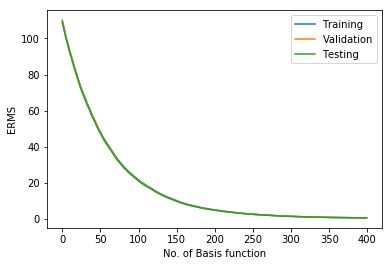

In [169]:
plt.plot( L_Erms_TR, label = 'Training')
plt.plot( L_Erms_Val, label = 'Validation')
plt.plot( L_Erms_Test, label = 'Testing')
plt.legend()
plt.ylabel('ERMS')
plt.xlabel('No. of Basis function')
plt.show()

## Gradient Descent solution for Linear Regression

In [206]:
W_Now        = np.dot(220, W)
#W_Now        =  W
La           = 1
learningRate = 0.01
L_Erms_Val   = []
L_Erms_TR    = []
L_Erms_Test  = []
W_Mat        = []
L_Acc_Val   = []
L_Acc_TR    = []
L_Acc_Test  = []


for i in range(0,400):
    
    #print ('---------Iteration: ' + str(i) + '--------------')
    Delta_E_D     = -np.dot((TrainingTarget[i] - np.dot(np.transpose(W_Now),TRAINING_PHI[i])),TRAINING_PHI[i])
    La_Delta_E_W  = np.dot(La,W_Now)
    Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
    Delta_W       = -np.dot(learningRate,Delta_E)
    W_T_Next      = W_Now + Delta_W
    W_Now         = W_T_Next
    
    #-----------------TrainingData Accuracy---------------------#
    TR_TEST_OUT   = GetValTest(TRAINING_PHI,W_T_Next) 
    Erms_TR       = GetErms(TR_TEST_OUT,TrainingTarget)
    L_Erms_TR.append(float(Erms_TR.split(',')[1]))
    L_Acc_TR.append(float(Erms_TR.split(',')[0]))
    
    #-----------------ValidationData Accuracy---------------------#
    VAL_TEST_OUT  = GetValTest(VAL_PHI,W_T_Next) 
    Erms_Val      = GetErms(VAL_TEST_OUT,ValDataAct)
    L_Erms_Val.append(float(Erms_Val.split(',')[1]))
    L_Acc_Val.append(float(Erms_Val.split(',')[0]))
    
    #-----------------TestingData Accuracy---------------------#
    TEST_OUT      = GetValTest(TEST_PHI,W_T_Next) 
    Erms_Test = GetErms(TEST_OUT,TestDataAct)
    L_Erms_Test.append(float(Erms_Test.split(',')[1]))
    L_Acc_Test.append(float(Erms_Test.split(',')[0]))

In [207]:
print ('----------Gradient Descent Solution--------------------')
print ("M = 10 \nLambda  = 1\neta=0.01")
print ("E_rms Training   = " + str(np.around(min(L_Erms_TR),5)))
print ("E_rms Validation = " + str(np.around(min(L_Erms_Val),5)))
print ("E_rms Testing    = " + str(np.around(min(L_Erms_Test),5)))

print ("Accuracy Training   = " + str(np.around(max(L_Acc_TR),5)))
print ("Accuracy Validation = " + str(np.around(max(L_Acc_Val),5)))
print ("Accuracy Testing    = " + str(np.around(max(L_Acc_Test),5)))


----------Gradient Descent Solution--------------------
M = 10 
Lambda  = 1
eta=0.01
E_rms Training   = 0.98243
E_rms Validation = 0.98122
E_rms Testing    = 0.9718
Accuracy Training   = 38.375
Accuracy Validation = 37.79264
Accuracy Testing    = 37.45819


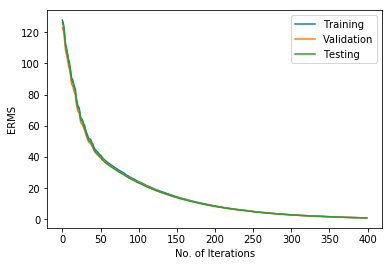

In [208]:
plt.plot( L_Erms_TR, label = 'Training')
plt.plot( L_Erms_Val, label = 'Validation')
plt.plot( L_Erms_Test, label = 'Testing')
plt.legend()
plt.ylabel('ERMS')
plt.xlabel('No. of Iterations')
plt.show()

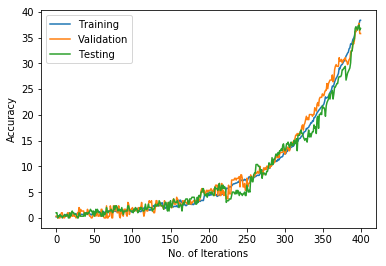

In [209]:
plt.plot( L_Acc_TR, label = 'Training')
plt.plot( L_Acc_Val, label = 'Validation')
plt.plot( L_Acc_Test, label = 'Testing')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('No. of Iterations')
plt.show()

# Logistic Regression

In [210]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [211]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [212]:
'''
Reading the target datas from the .csv file and storing it in an python list
In this Dataset the Target Vector will be of form 1 x 69623'''
def GetTargetVector(filePath):
    t = []
    with open(filePath, 'rU') as f:
        reader = csv.reader(f)
        for row in reader:  
            t.append(int(row[0]))
    #print("Raw Training Generated..")
    return t

'''
Creating a input Data Matrix by reading the .csv file
The raw input data matrix will be of form <number of features> x <number of rows in the dataset>
Here, the dataMatrix will be of form 41 x 69623'''
def GenerateRawData(filePath, IsSynthetic):    
    dataMatrix = [] 
    with open(filePath, 'rU') as fi:
        reader = csv.reader(fi)
        for row in reader:
            dataRow = []
            for column in row:
                dataRow.append(float(column))
            dataMatrix.append(dataRow)   
    
    #if IsSynthetic == False :
    #    dataMatrix = np.delete(dataMatrix, [5,6,7,8,9], axis=1)
    dataMatrix = np.transpose(dataMatrix)     
    #print ("Data Matrix Generated..")
    return dataMatrix

'''
We can not use the entired dataset for our training, so we will be dividing 
the entire raw input and the target values for Training, Validation and Testing'''
def GenerateTrainingTarget(rawTraining,TrainingPercent = 80):
    TrainingLen = int(math.ceil(len(rawTraining)*(TrainingPercent*0.01)))
    t           = rawTraining[:TrainingLen]
    #print(str(TrainingPercent) + "% Training Target Generated..")
    return t

'''We are taking 80% of the Raw data and target for training'''
def GenerateTrainingDataMatrix(rawData, TrainingPercent = 80):
    T_len = int(math.ceil(len(rawData[0])*0.01*TrainingPercent))
    d2 = rawData[:,0:T_len]
    #print(str(TrainingPercent) + "% Training Data Generated..")
    return d2

'''We are taking 10% of the Raw data and target for Validation'''
def GenerateValData(rawData, ValPercent, TrainingCount): 
    valSize = int(math.ceil(len(rawData[0])*ValPercent*0.01))
    V_End = TrainingCount + valSize
    dataMatrix = rawData[:,TrainingCount+1:V_End]
    #print (str(ValPercent) + "% Val Data Generated..")  
    return dataMatrix

def GenerateValTargetVector(rawData, ValPercent, TrainingCount): 
    valSize = int(math.ceil(len(rawData)*ValPercent*0.01))
    V_End = TrainingCount + valSize
    t =rawData[TrainingCount+1:V_End]
    #print (str(ValPercent) + "% Val Target Data Generated..")
    return t

'''BigSigma Matrix is a matrix that is to be multiplied in form of inverse. In order to make the matrix multiplication 
easier we want Bigsigma to be an square matrix. 
This Matrix will only have variance of the each features in the diagonals. 
Thus we will get a matrix of form <number of features> x <number of features>
In our case, it will be 41 x 41
Note: BigSigma is calulated only for training dataset.
'''
"""def GenerateBigSigma(Data, MuMatrix,TrainingPercent,IsSynthetic):
    BigSigma    = np.zeros((len(Data),len(Data)))
    DataT       = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))        
    varVect     = []
    for i in range(0,len(DataT[0])):
        vct = []
        for j in range(0,int(TrainingLen)):
            vct.append(Data[i][j])    
        varVect.append(np.var(vct))
    
    for j in range(len(Data)):
        BigSigma[j][j] = varVect[j] +0.2
    if IsSynthetic == True:
        BigSigma = np.dot(3,BigSigma)
    else:
        BigSigma = np.dot(200,BigSigma)
    ##print ("BigSigma Generated..")
    return BigSigma"""

'''
This function is to compute "(X - Mu)T * BigSigmaInverse * (X - Mu)"
'''
"""
def GetScalar(DataRow,MuRow, BigSigInv):  
    R = np.subtract(DataRow,MuRow)
    T = np.dot(BigSigInv,np.transpose(R))  
    L = np.dot(R,T)
    return L
"""

'''
This funtion is to compute the exponential part of the equation in basis funtion computation
'''
"""
def GetRadialBasisOut(DataRow,MuRow, BigSigInv):    
    phi_x = math.exp(-0.5*GetScalar(DataRow,MuRow,BigSigInv))
    return phi_x
"""
'''
W = ((λI+ΦT * Φ)Inv * Φ)T 
'''
def GetWeightsClosedForm(PHI, T, Lambda):
    Lambda_I = np.identity(len(PHI[0]))
    for i in range(0,len(PHI[0])):
        Lambda_I[i][i] = Lambda
    PHI_T       = np.transpose(PHI)
    PHI_SQR     = np.dot(PHI_T,PHI)
    PHI_SQR_LI  = np.add(Lambda_I,PHI_SQR)
    PHI_SQR_INV = np.linalg.inv(PHI_SQR_LI)
    INTER       = np.dot(PHI_SQR_INV, PHI_T)
    W           = np.dot(INTER, T)
    ##print ("Training Weights Generated..")
    return W

'''
Phi Matrix is the design matrix which will have all the values of x applied to all the basis funtions
This will be of form <number of features> x <number of rows in the training data>
'''
def GetPhiMatrix(Data, MuMatrix, BigSigma, TrainingPercent = 80):
    DataT = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))         
    PHI = np.zeros((int(TrainingLen),len(MuMatrix))) 
    BigSigInv = np.linalg.inv(BigSigma)
    for  C in range(0,len(MuMatrix)):
        for R in range(0,int(TrainingLen)):
            PHI[R][C] = GetRadialBasisOut(DataT[R], MuMatrix[C], BigSigInv)
    #print ("PHI Generated..")
    return PHI

'''Funtion for validation'''
def GetValTest(VAL_PHI,W):
    Y = np.dot(W,np.transpose(VAL_PHI))
    ##print ("Test Out Generated..")
    return Y

def GetErms(VAL_TEST_OUT,ValDataAct):
    sum = 0.0
    t=0
    accuracy = 0.0
    counter = 0
    val = 0.0
    for i in range (0,len(VAL_TEST_OUT)):
        sum = sum + math.pow((ValDataAct[i] - VAL_TEST_OUT[i]),2)
        if(int(np.around(VAL_TEST_OUT[i], 0)) == ValDataAct[i]):
            counter+=1
    accuracy = (float((counter*100))/float(len(VAL_TEST_OUT)))
    ##print ("Accuracy Generated..")
    ##print ("Validation E_RMS : " + str(math.sqrt(sum/len(VAL_TEST_OUT))))
    return (str(accuracy) + ',' +  str(math.sqrt(sum/len(VAL_TEST_OUT))))

## Fetch and Prepare Dataset

In [279]:
RawTarget = GetTargetVector('HOConcatTarget.csv')
RawData   = GenerateRawData('HOConcatData.csv',IsSynthetic)

#RawTarget = GetTargetVector('HOSubTarget.csv')
#RawData   = GenerateRawData('HOSubData.csv',IsSynthetic)

#RawTarget = GetTargetVector('GSCConcatTarget.csv')
#RawData   = GenerateRawData('GSCConcatData.csv',IsSynthetic)

#RawTarget = GetTargetVector('GSCSubTarget.csv')
#RawData   = GenerateRawData('GSCSubData.csv',IsSynthetic)



/home/baskar/Environments/env1/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 'U' mode is deprecated
  
/home/baskar/Environments/env1/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 'U' mode is deprecated


## Prepare Training Data

In [280]:
TrainingTarget = np.array(GenerateTrainingTarget(RawTarget,TrainingPercent))
TrainingData   = GenerateTrainingDataMatrix(RawData,TrainingPercent)
print(TrainingTarget.shape)
print(TrainingData.shape)


(1266,)
(18, 1266)


## Prepare Validation Data

In [281]:
ValDataAct = np.array(GenerateValTargetVector(RawTarget,ValidationPercent, (len(TrainingTarget))))
ValData    = GenerateValData(RawData,ValidationPercent, (len(TrainingTarget)))
print(ValDataAct.shape)
print(ValData.shape)

(158,)
(18, 158)


## Prepare Test Data

In [282]:
TestDataAct = np.array(GenerateValTargetVector(RawTarget,TestPercent, (len(TrainingTarget)+len(ValDataAct))))
TestData = GenerateValData(RawData,TestPercent, (len(TrainingTarget)+len(ValDataAct)))
print(ValDataAct.shape)
print(ValData.shape)

(158,)
(18, 158)


In [274]:
def calcAccuracy(h,y):
    sum = 0.0
    t=0
    accuracy = 0.0
    counter = 0
    val = 0.0
    for i in range (0,len(VAL_TEST_OUT)):
        sum = sum + math.pow((ValDataAct[i] - VAL_TEST_OUT[i]),2)
        if(int(np.around(VAL_TEST_OUT[i], 0)) == ValDataAct[i]):
            counter+=1
    accuracy = (float((counter*100))/float(len(VAL_TEST_OUT)))
    
        

In [275]:
#W_Now        = np.dot(220, W)
#W_Now        =  W
La           = 2
learningRate = 0.01
L_Erms_Val   = []
L_Erms_TR    = []
L_Erms_Test  = []
W_Mat        = []


lr=0.1

X = TrainingData
X = np.transpose(TrainingData)
y = TrainingTarget
W_Now = np.zeros(X.shape[1])
loss_TR = 0
loss_Val = 0
loss_Test = 0
L_Erms_TR = []
L_Erms_Val = []
L_Erms_Test = []
L_Acc_TR = []
L_Acc_Val = []
L_Acc_Test = []


for i in range(0,400):
    
    z = np.dot(X, W_Now)
    h = sigmoid(z)
    gradient = np.dot(X.T, (h - y)) / y.size
    W_Now -= lr * gradient
    
    
    
    #-----------------TrainingData Accuracy---------------------#
    z = np.dot(X, W_Now)
    h = sigmoid(z)
    loss_TR = loss(h, y)
    
    
    #-----------------ValidationData Accuracy---------------------#
    #ValData = np.transpose(ValData)
    z1 = np.dot(np.transpose(ValData), W_Now)
    h1 = sigmoid(z1)
    loss_Val = loss(h1, ValDataAct)
    
    
    #-----------------TestingData Accuracy---------------------#
    #TestData = np.transpose(TestData)
    z2 = np.dot(np.transpose(TestData), W_Now)
    h2 = sigmoid(z2)
    loss_Test = loss(h2, TestDataAct)
    
    
    
    #-----------------TrainingData Accuracy---------------------#
    #TR_TEST_OUT   = GetValTest(TRAINING_PHI,W_T_Next) 
    Erms_TR       = GetErms(h,y)
    L_Acc_TR.append(float(Erms_TR.split(',')[0]))
    
    #-----------------ValidationData Accuracy---------------------#
    #VAL_TEST_OUT  = GetValTest(VAL_PHI,W_T_Next) 
    Erms_Val      = GetErms(h1,ValDataAct)
    L_Acc_Val.append(float(Erms_Val.split(',')[0]))
    
    #-----------------TestingData Accuracy---------------------#
    #TEST_OUT      = GetValTest(TEST_PHI,W_T_Next) 
    Erms_Test = GetErms(h2,TestDataAct)
    L_Acc_Test.append(float(Erms_Test.split(',')[0]))
    
    
    L_Erms_TR.append(loss_TR)
    L_Erms_Val.append(loss_Val)
    L_Erms_Test.append(loss_Test)
    


In [276]:
print ('----------Gradient Descent Solution--------------------')
print ("Learning rate=0.01")
print ("E_rms Training   = " + str(loss_TR))
print ("E_rms Validation = " + str(loss_Val))
print ("E_rms Testing    = " + str(loss_Test))


print ("Acc Training   = " + str(max(L_Acc_TR)))
print ("Acc Validation = " + str(max(L_Acc_Val)))
print ("Acc Testing    = " + str(max(L_Acc_Test)))



----------Gradient Descent Solution--------------------
Learning rate=0.01
E_rms Training   = 0.0872948542074056
E_rms Validation = 0.11643425315187018
E_rms Testing    = 0.11363068587719602
Acc Training   = 100.0
Acc Validation = 99.33110367892976
Acc Testing    = 99.66555183946488


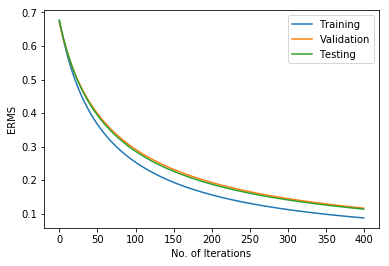

In [277]:
plt.plot( L_Erms_TR, label = 'Training')
plt.plot( L_Erms_Val, label = 'Validation')
plt.plot( L_Erms_Test, label = 'Testing')
plt.legend()
plt.ylabel('ERMS')
plt.xlabel('No. of Iterations')
plt.show()

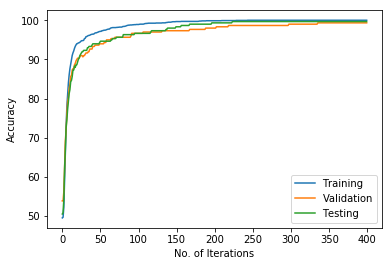

In [278]:
plt.plot( L_Acc_TR, label = 'Training')
plt.plot( L_Acc_Val, label = 'Validation')
plt.plot( L_Acc_Test, label = 'Testing')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('No. of Iterations')
plt.show()

# Neural Network

In [283]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 18
#input_size = 9
drop_out = 0.2
first_dense_layer_nodes  = 256
second_dense_layer_nodes = 2

def get_model():
    
    # Why do we need a model?
    # We need model to implement a ML algorithm. 
    # Why use Dense layer and then activation?
    # Dense layer is used because it connects all the inputs to all the outputs.
    # A weighted sum is computed with each of the connection that is pointing to a neuron which may be any big value.
    # We use activation funtion on the dense layer to bring that weighted sum to bring down to a reasonable range.
    # Why use sequential model with layers?
    # In this Model we are not re-using any layers, thus we are going with the sequential model in keras.
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    # Why dropout?
    # Dropout is a regularization technique which helps to avoid overfitting by randomly dropping few nodes.
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    # It gives the probabilities of different classes when the output is passed through this.
    # Since, we are using 4 output for classification, Softmax gives the probabilities of each.
    model.summary()
    
    # Why use categorical_crossentropy?
    # It is a loss funtion that is ideal for classification type problems with more than two classes. 
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

Using TensorFlow backend.


In [284]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               4864      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 5,378
Trainable params: 5,378
Non-trainable params: 0
_________________________________________________________________


In [ ]:
validation_data_split = 0.2
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
#dataset = pd.read_csv('training.csv')

# Process Dataset
#TrainingData, TrainingTarget = processData(dataset)
history = model.fit(TrainingData
                    , TrainingTarget
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

In [ ]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

In [ ]:
wrong   = 0
right   = 0

#testData = pd.read_csv('testing.csv')

#processedTestData  = encodeData(testData['input'].values)
#processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(TestData,TestDataAct): 
    y = model.predict(np.array(i).reshape(-1,input_size))
    #TestDataAct.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))
"""
# Please input your UBID and personNumber 
#testDataInput = testData['input'].tolist()
#testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "BASKARAD")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50291475")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel
"""

In [ ]:
imgB = getImgBFeatures(imgA,HOImg)

In [ ]:
matrix = imgA.values

In [ ]:
matrix[:,[4,5]]

In [ ]:
list = [i for i in range(791)]
print(list)

b = pd.DataFrame(matrix[:,[4,5]], index = list)

In [ ]:
pd.concat([imgA,b],axis=1)

In [ ]:
a = pd.DataFrame([1,2,3,4], index=['a', 'b', 'c', 'd'],                  columns=['one'])

In [ ]:
a = pd.DataFrame([1,2,3,4,5,6,7])

In [ ]:
a


In [ ]:
b = pd.DataFrame([2, 1, 1,4,6,7,3])

In [ ]:
b

In [ ]:
new_dataframe = pd.concat([
    original_dataframe,
    pd.DataFrame(np.zeros((10, 3)), dtype=np.int)
], axis=1, ignore_index=True)

In [ ]:
newdf = pd.concat([a,b])

In [ ]:
newdf.resetIndex()

In [ ]:
pd.concat([a,b],axis=1)

In [ ]:
Diff

In [ ]:
def getImgAFeatures(df,imgFeatures):
    imgA = pd.merge(df, imgFeatures, left_on='img_id_A', right_on='img_id')
    imgA = imgA.drop(columns=['img_id', 'Unnamed: 0'])
    return imgA

In [ ]:
def getImgBFeatures(imgA,imgFeatures):
    imgA = imgA.drop(columns = ['f1','f2','f3','f4','f5','f6','f7','f8','f9'])
    imgB = pd.merge(imgA, imgFeatures, left_on='img_id_B', right_on='img_id')
    #imgB = imgB.drop(columns=['img_id', 'Unnamed: 0'])
    return imgB